In [1]:
import pandas as pd
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


New version of basemap is available. Using conda you can install it for python 3.6 through:

conda install -c conda-forge basemap=1.1.0

conda install -c conda-forge basemap-data-hires=1.1.0

#If an error is returned, we recommend searching for similar errors on StackOverflow to help debug the issue. Because basemap uses matplotlib, you'll want to import matplotlib.pyplot into your environment when you use Basemap.

In [6]:
import matplotlib.pyplot as plt
#Basemap Bug Fix
import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)

In [7]:
import pandas as pd
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
print(x)

[36181909.30105094, 36226033.53986971, 36060037.49493744, 36330283.404696316, 36385192.32317709, 35990354.44709509, 14963941.458273921, 14268741.541486904, 14378684.250292266, 12375638.020887403, 18005485.43317323, 18413716.731862824, 18321888.33524768, 18077397.938244995, 17442553.042491462, 17501455.413687292, 17350292.20901023, 17575400.005086605, 17911640.962292437, 17760170.414982848, 10618060.258599434, 9225560.732214285, 12954264.67851546, 13778929.009821879, 6029820.04527255, 10028881.874571005, 12431092.795006035, 12120642.599331541, 9331720.924981104, 6085602.844270321, 8900933.52365312, 8324233.650806665, 6241349.72405515, 6934946.3219498545, 12737465.474640507, 12639490.447764657, 7211667.109238329, 7622933.694411267, 6456097.827279047, 12396375.19777225, 10745934.475221692, 4544781.58702558, 4554480.226350438, 6614828.621515303, 13633449.197559252, 5556160.792994859, 8889752.211874548, 6651343.795086775, 7385594.462163575, 9554882.921952376, 8565804.515190138, 7064766.3376

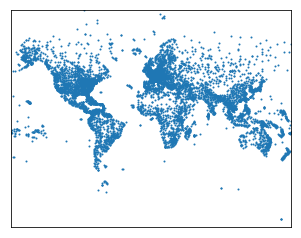

In [9]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
plt.show()

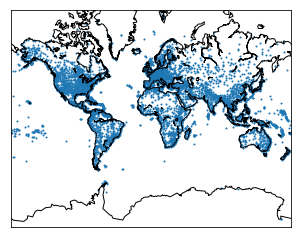

In [10]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

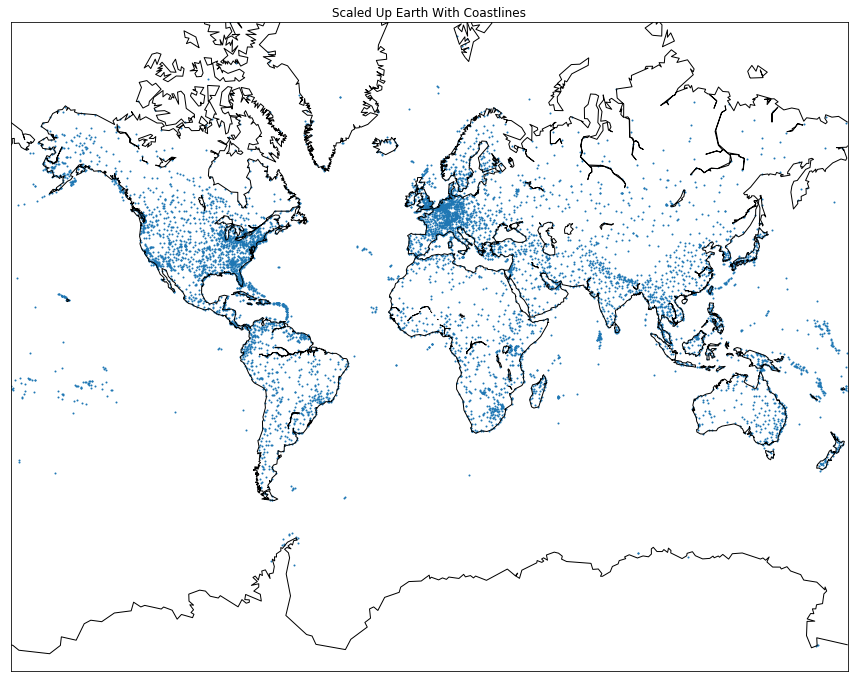

In [11]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()

plt.show()

In [14]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()
print(geo_routes[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


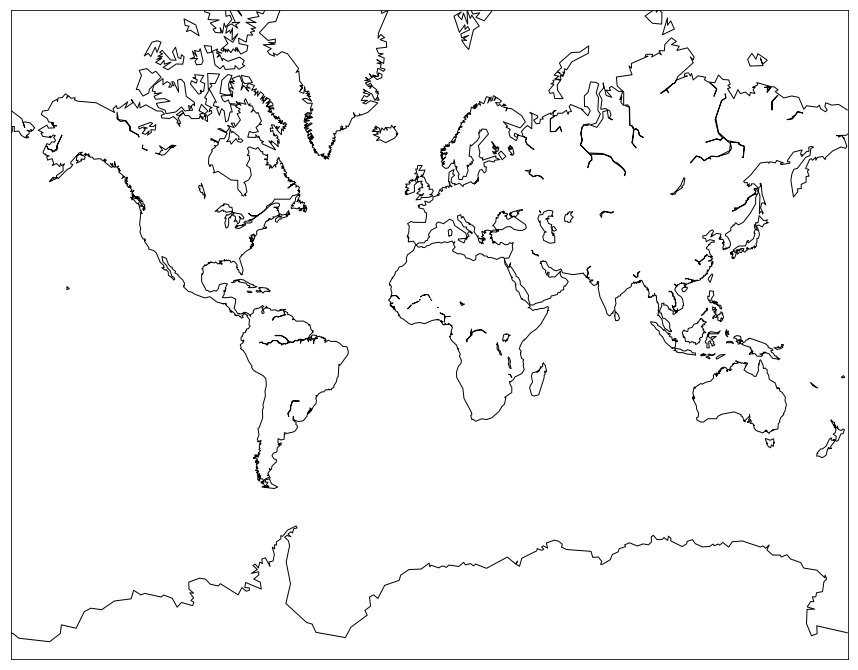

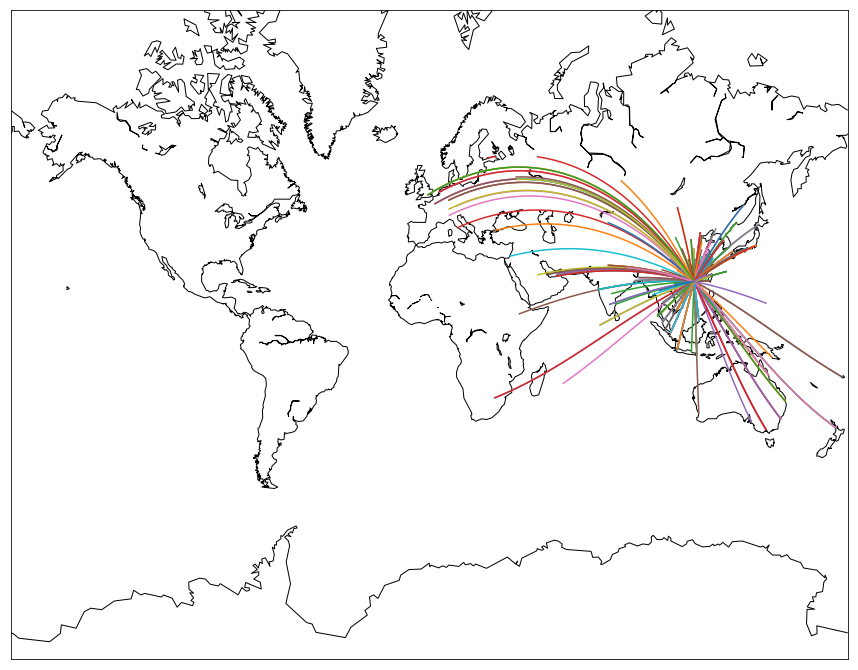

In [15]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "HKG"]
create_great_circles(dfw)
plt.show()

Here are some suggestions for what to do next:

Plotting tools:
Creating 3D plots using Plotly(https://plot.ly/python/3d-scatter-plots/)
Creating interactive visualizations using bokeh(http://bokeh.pydata.org/en/latest/)
Creating interactive map visualizations using folium(https://folium.readthedocs.io/en/latest/)
